In [1]:
import sys
sys.version

'3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:09:58) \n[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]'

In [8]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
np.random.seed(0)
x = np.random.normal(0, 0.3, (2, 1))

X = [x]
F = np.array([[0.3, 0.5], [1, 0]])
Q = np.array([[0.5, 0],[0,0]])

for i in range(10):
    x = F @ x + np.random.multivariate_normal([0,0], Q,1).T
    X.append(x)

a, b = np.array(np.concatenate(X, axis=1))
print(a)

[ 0.5292157   0.91086056  1.85842894  1.68477292  1.3616596   1.35273853
  1.62478629  1.47766385  2.31216575  1.65385394 -0.15299735]


In [7]:
H = np.mat([1, 0])
H.shape


(1, 2)

In [9]:

p = np.random.multivariate_normal([0, 0], [[1, 0],[1, 2]], 1)
np.log(p)


array([[-0.09723869, -1.47711228]])

In [33]:
K = np.array([[1],[0.5]])
yi = 3
nu_ = [nu]
for i in range(1, 2):
    nu = np.power(K*yi, 2)
    nu_.append(nu)
    a, b = np.array(np.concatenate(nu_, axis=1))
    print(nu_)
    print(nu_[-1]+nu_[-2])


[array([[ 9.  ],
       [ 2.25]]), array([[ 9.  ],
       [ 2.25]])]
[[ 18. ]
 [  4.5]]


In [60]:
Q = np.mat([[1,0],[0,0]])
eps=np.zeros((3, 1))
eps[0:2, :] = np.random.multivariate_normal([0,0], Q, 1).T
eps[2, :] = np.random.normal(0, 1)
print(eps.shape)

(3, 1)


In [73]:
x = np.mat(np.random.normal(0, 0.3, (2, 1)))
z = np.mat([1])
x_ = np.vstack([x, z])
x_[2, 0]

1.0

In [112]:
Q = np.mat([[1, 0, 0],[0, 0, 0], [0, 0, 0.1]])
a = np.random.multivariate_normal([0,0,0], Q, 1).T
print(np.log(2))

0.69314718056


In [111]:
x = np.zeros((3, 4, 5))
x_resampled = np.zeros((3, 4, 5))
initial_x = np.random.normal(0, 1, size=(3,5))
x_resampled[:, 0, :] = initial_x
x[:, 0, :] = initial_x
x[:, 0, 0].shape

(3,)

In [120]:
(F@x[:, 0, 0]).T.shape
v = np.random.multivariate_normal([0,0,0], Q, 1)
v.shape

(1, 3)

In [44]:
idx = np.asanyarray(range(100))
idx.shape
u0 = np.random.uniform(0, 1/100)
u0

0.0025052058641717857

In [45]:
np.cumsum(idx)

array([   0,    1,    3,    6,   10,   15,   21,   28,   36,   45,   55,
         66,   78,   91,  105,  120,  136,  153,  171,  190,  210,  231,
        253,  276,  300,  325,  351,  378,  406,  435,  465,  496,  528,
        561,  595,  630,  666,  703,  741,  780,  820,  861,  903,  946,
        990, 1035, 1081, 1128, 1176, 1225, 1275, 1326, 1378, 1431, 1485,
       1540, 1596, 1653, 1711, 1770, 1830, 1891, 1953, 2016, 2080, 2145,
       2211, 2278, 2346, 2415, 2485, 2556, 2628, 2701, 2775, 2850, 2926,
       3003, 3081, 3160, 3240, 3321, 3403, 3486, 3570, 3655, 3741, 3828,
       3916, 4005, 4095, 4186, 4278, 4371, 4465, 4560, 4656, 4753, 4851,
       4950])

In [60]:
def F_inv(w_cumsum, idx, u):
    if np.any(w_cumsum < u) == False:
        return 0
    k = np.max(idx[w_cumsum < u])
    return k+1

In [175]:
def F_inv(w_cumsum, idx, u):
    if np.any(w_cumsum < u) == False:
        return 0
    k = np.max(idx[w_cumsum < u])
    return k+1

def resampling2(weights):
    """
    計算量の少ない層化サンプリング
    """
    idx = np.asanyarray(range(n_particle))
    u0 = np.random.uniform(0, 1/n_particle)
    u = [1/n_particle*i + u0 for i in range(n_particle)]
    w_cumsum = np.cumsum(weights)
    k = np.asanyarray([F_inv(w_cumsum, idx, val) for val in u])
    return k

def norm_likelihood(y, x, s2):
    return (np.sqrt(2*np.pi*s2))**(-1) * np.exp(-(y-x)**2/(2*s2))

In [177]:
np.random.seed(0)
y = np.genfromtxt(fname='../data/garch_obs_states.txt', delimiter=',')
# 時系列データ数
T = len(y)
n_particle = 100
#  system model
#  AR(2)model parameter
phi1 = np.random.normal(0, 0.3)
phi2 = np.random.normal(0, 0.3)
sigma = 1
a = 0.6
F = np.mat([[phi1, phi2, 0], [1, 0, 0], [0, 0, a]])
Q = np.mat([[sigma, 0, 0], [0, 0, 0], [0, 0, 0.1]])

#  observation model
H = np.mat([1, 0, 0])
R = 1

# 潜在変数
x = np.zeros((3, T+1, n_particle))
x_resampled = np.zeros((3, T+1, n_particle))

# 潜在変数の初期値
initial_x = np.random.normal(0, 1, size=(3,n_particle))   #--- (1)
x_resampled[:, 0, :] = initial_x
x[:, 0, :] = initial_x

y_pred = np.zeros((T+1, n_particle))

# 重み
w        = np.zeros((T, n_particle))
w_normed = np.zeros((T, n_particle))

l = np.zeros(T) # 時刻毎の尤度

for t in range(T):
    print("\r calculating... t={}".format(t), end="")
    for i in range(n_particle):
        # AR(2)モデルを適用
        v = np.random.multivariate_normal([0,0,0], Q, 1) # System Noise　#--- (2)
        x[:, t+1, i] = F @ x_resampled[:, t, i] + v # システムノイズの付加
        y_pred[t+1, i] = H @ x[:, t+1, i] 
        w[t, i] = norm_likelihood(y[t], y_pred[t+1, i], sigma) # y[t]に対する各粒子の尤度
    w_normed[t] = w[t]/np.sum(w[t]) # 規格化
    l[t] = np.log(np.sum(w[t])) # 各時刻対数尤度
    # Resampling
    #k = self.resampling(w_normed[t]) # リリサンプリングで取得した粒子の添字
    k = resampling2(w_normed[t]) # リリサンプリングで取得した粒子の添字（層化サンプリング）
    x_resampled[:, t+1] = x[:, t+1, k]
    

 calculating... t=99

In [1]:
def get_filtered_value():
    """
    尤度の重みで加重平均した値でフィルタリングされ値を算出
    """
    return np.diag(np.dot(w_normed, x[1:].T))

def draw_graph():
    # グラフ描画
    T = len(y)

    plt.figure(figsize=(16,8))
    plt.plot(range(T), y)
    plt.plot(get_filtered_value(), "g")

    for t in range(T):
        plt.scatter(np.ones(n_particle)*t, x[t], color="r", s=2, alpha=0.1)

    plt.title("log likelihood={0:.3f}".format(log_likelihood))
    plt.show()
draw_graph()

NameError: name 'y' is not defined

In [7]:
a = np.array([1, 2, 3, 4, 5, 6, 7])
print(a**2)
np.mean(a**2)

[ 1  4  9 16 25 36 49]


20.0

In [16]:
true_x = np.genfromtxt(fname='../data/garch_hid_states.txt', delimiter=',')
true_x[:, 2].shape
v_noise = np.zeros((1000+1, 1000))
v_noise[0] = np.random.uniform(np.min(true_x[2]), np.max(true_x[2]), 1000)
print(v_noise[0])

[-1.88725068 -0.20592225 -0.94237565 -1.95925136 -1.3142879  -0.57012686
 -1.03254369 -0.06865265 -1.16157128 -1.34970309 -0.37932224 -0.91596233
 -0.65246979 -0.41062616 -0.6738343  -1.16196838 -1.74535151 -0.85256594
 -0.23081324 -1.16885869 -0.20475818 -1.0029547  -0.77299395 -0.35713933
 -0.88324545 -1.81166008 -0.06704456 -1.50806128 -0.59723324 -0.99984654
 -1.0514803  -1.51180233 -0.57440563 -1.76889019 -0.04847361 -0.33286189
 -0.94222489 -1.1577628  -1.4284463  -1.00675037 -0.2661283  -1.45090695
 -1.00881646 -1.53021059 -1.32909356 -1.61702755 -0.04830526 -0.86971928
 -0.55350114 -1.79738855 -1.27230906 -0.24020961 -1.8244623  -1.66559647
 -0.76402389 -0.76917656 -0.34687058 -0.15620837 -1.71165527 -1.48155025
 -1.1520616  -1.98820936 -1.85312861 -1.54600727 -1.04691431 -1.4969401
 -0.27149062 -1.35433382 -0.17751587 -0.07918252 -1.10815242 -1.54475755
 -1.41825021 -0.46819519 -1.45415444 -1.24395385 -1.05186603 -0.86263569
 -0.03740399 -1.53479779 -1.29719179 -1.47465546 -1.

In [19]:
粒子フィルタ　EMアルゴリズム　コード

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

sns.set(style='darkgrid')

class ParticleFilter(object):
    def __init__(self, y, n_particle):
        self.y = y
        self.n_particle = n_particle
        self.log_likelihood = -np.inf

    def norm_likelihood(self, y, x, s2):
        return (np.sqrt(2*np.pi*s2))**(-1) * np.exp(-(y-x)**2/(2*s2))

    def F_inv(self, w_cumsum, idx, u):
            if np.any(w_cumsum < u) == False:
                return 0
            k = np.max(idx[w_cumsum < u])
            return k+1

    def resampling(self, weights):
        w_cumsum = np.cumsum(weights)
        idx = np.asanyarray(range(self.n_particle))
        k_list = np.zeros(self.n_particle, dtype=np.int32) # サンプリングしたkのリスト格納場所

        # 一様分布から重みに応じてリサンプリングする添え字を取得
        for i, u in enumerate(np.random.uniform(0, 1, size=self.n_particle)):
            k = self.F_inv(w_cumsum, idx, u)
            k_list[i] = k
        return k_list

    def resampling2(self, weights):
        """
        計算量の少ない層化サンプリング
        """
        idx = np.asanyarray(range(self.n_particle))
        u0 = np.random.uniform(0, 1/self.n_particle)
        u = [1/self.n_particle*i + u0 for i in range(self.n_particle)]
        w_cumsum = np.cumsum(weights)
        k = np.asanyarray([self.F_inv(w_cumsum, idx, val) for val in u])
        return k


    #  calculator
    def init_initial(self):
        self.phi1_ = [self.phi1]
        self.phi2_ = [self.phi2]
        self.alpha_ = [self.alpha]

        self.a = 0
        self.b = 0
        self.c = 0
        self.d = 0
        self.e = 0
        self.f = 0
        self.g = 0
        self.h = 0
        

    #  phi estimator
    def lse_phi(self, x, x2, log_sigma, log_sigma2):
        self.a += x2[-3]
        self.c += x[-1] * x[-2]
        self.b += x2[-3]
        self.d += x[-1] * x[-2]
        self.e += x[-1] * x[-3]
        # self.f += log_sigma[-1]*log_sigma[-2]
        # self.g += log_sigma2[-2]
        if len(x) >= 3:
            self.phi1 = (self.b * self.c - self.d * self.e) / (self.a * self.b - self.d**2)
            self.phi2 = (self.a * self.e - self.c * self.d) / (self.a * self.b - self.d**2)
            # self.alpha = self.f / self.g
            self.F = np.mat([[self.phi1, self.phi2, 0], [1, 0, 0], [0, 0, self.alpha]])

        return self

    def get_filtered_value_em(self, w, x):
        return np.dot(w, x.T)

    def get_filtered_value_em_2(self, w, x):
        return np.dot(w, (x**2).T)

    
    def simulate(self, seed=71):
        np.random.seed(seed)

        # 時系列データ数
        T = len(self.y)

        #  system model
        #  AR(2)model parameter
        self.phi1 = 0.6
        self.phi2 = 0.2
        self.sigma = np.exp(0) + np.random.normal(0, 0.01, self.n_particle)
        self.alpha = 1
        self.F = np.mat([[self.phi1, self.phi2, 0], [1, 0, 0], [0, 0, self.alpha]])
        self.sigma_ = [self.sigma]

        self.init_initial()
        
        #  observation model
        H = np.mat([1, 0, 0])
        R = 0.1

        # 潜在変数
        x = np.zeros((3, T+1, self.n_particle))
        x_resampled = np.zeros((3, T+1, self.n_particle))

        # 潜在変数の初期値
        true_x = np.genfromtxt(fname='../data/garch_hid_states.txt', delimiter=',')
        
        # initial_x =  np.random.normal(0, .01, size=(3,self.n_particle)).T + true_x[0]  #--- (1)
        initial_x = np.random.normal(0, 0.01, (3, self.n_particle)).T + true_x[0]
        x_resampled[:, 0, :] = initial_x.T
        x[:, 0, :] = initial_x.T
        self.x_mean = 0
        x2_mean = 0
        sigma_mean = 0
        sigma2_mean = 0

        self.x_mean_ = [self.x_mean]
        x2_mean_ = [x2_mean]
        sigma_mean_ = [sigma_mean]
        sigma2_mean_ = [sigma2_mean]

        y_pre = np.zeros((T+1, self.n_particle))

        # 重み
        w        = np.zeros((T, self.n_particle))
        w_normed = np.zeros((T, self.n_particle))

        l = np.zeros(T) # 時刻毎の尤度


        for t in range(T):
            print("\r calculating... t={}".format(t), end="")
            for i in range(self.n_particle):
                # AR(2)モデルを適用
                self.Q = np.mat([[self.sigma[i], 0, 0], [0, 0, 0], [0, 0, 0.01]])
                v = np.random.multivariate_normal([0,0,0], self.Q, 1) # System Noise　#--- (2)
                x[:, t+1, i] = self.F @ x_resampled[:, t, i] + v # システムノイズの付加
                y_pre[t+1, i] = H @ x[:, t+1, i] 
                w[t, i] = self.norm_likelihood(self.y[t], y_pre[t+1, i], R) # y[t]に対する各粒子の尤度
                
            w_normed[t] = w[t]/np.sum(w[t]) # 規格化
            l[t] = np.log(np.sum(w[t])) # 各時刻対数尤度
            # Resampling
            #k = self.resampling(w_normed[t]) # リリサンプリングで取得した粒子の添字
            k = self.resampling2(w_normed[t]) # リリサンプリングで取得した粒子の添字（層化サンプリング）
            x_resampled[:, t+1] = x[:, t+1, k]
            self.sigma = np.exp(x_resampled[2, t+1, :])
            self.sigma_.append(self.sigma)

            # x_mean = self.get_filtered_value_em(w_normed[t], x[0, t+1])
            # x2_mean = self.get_filtered_value_em_2(w_normed[t], x[0, t+1])
            # sigma_mean = self.get_filtered_value_em(w_normed[t], x[2, t+1])
            # sigma2_mean = self.get_filtered_value_em_2(w_normed[t], x[2, t+1])

            self.x_mean = np.mean(x_resampled[0, t+1, :])
            x2_mean = np.mean(x_resampled[0, t+1, :]**2)
            sigma_mean = np.mean(x_resampled[2, t+1, :])
            sigma2_mean = np.mean(x_resampled[2, t+1, :]**2)

            self.x_mean_.append(self.x_mean)
            x2_mean_.append(x2_mean)
            sigma_mean_.append(sigma_mean)
            sigma2_mean_.append(sigma2_mean)

            if t >= 1:
                self.lse_phi(self.x_mean_, x2_mean_, sigma_mean_, sigma2_mean_)
            self.phi1_.append(self.phi1)
            self.phi2_.append(self.phi2)
            self.alpha_.append(self.alpha)


        # 全体の対数尤度
        self.log_likelihood = np.sum(l) - T*np.log(self.n_particle)
        self.mse = np.mean((self.y - self.x_mean_[1:])**2)
        self.x = x
        self.x_resampled = x_resampled
        self.w = w
        self.w_normed = w_normed
        self.l = l

    def get_filtered_value(self, a):
        """
        尤度の重みで加重平均した値でフィルタリングされ値を算出
        """
        return np.diag(np.dot(self.w_normed, self.x[a, 1:].T))

粒子フィルタ　EMアルゴリズム　実行

In [18]:
x = np.genfromtxt(fname='../data/garch_hid_states.txt', delimiter=',')
y = np.genfromtxt(fname='../data/garch_obs_states.txt', delimiter=',')

pf = ParticleFilter(y, 10000)
pf.simulate()

print(pf.phi1_[-1])
print(pf.phi2_[-1])
mse = np.mean((y - pf.x_mean_[1:])**2)
print(mse)

calculating... t=19990.548826369876
0.120112266814
0.0072559784275


潜在変数の推定結果表示

fig saved


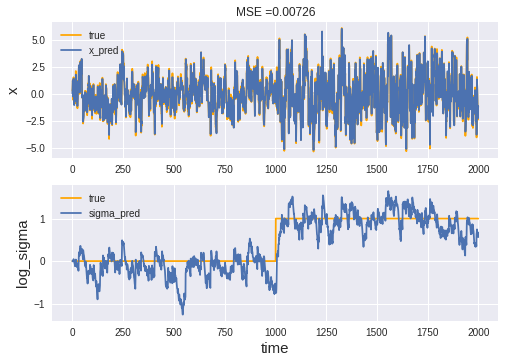

In [25]:
true_x = np.genfromtxt(fname='../data/garch_hid_states.txt', delimiter=',')

plt.subplot(2, 1, 1)
plt.ylabel("x", fontsize=15)
plt.tick_params(labelsize=10)
plt.plot(true_x[:, 0], label='true', color='orange')
plt.plot(pf.get_filtered_value(0), label='x_pred')
# for t in range(T):
#     plt.scatter(np.ones(self.n_particle)*t, self.x[0, t], color="r", s=0.1, alpha=0.01)

plt.title("MSE ={0:.5f}".format(mse))
plt.legend()

plt.subplot(2, 1, 2)
plt.xlabel("time", fontsize=15)
plt.ylabel("log_sigma", fontsize=15)
plt.tick_params(labelsize=10)
plt.plot(true_x[:, 2], label='true',color='orange')
plt.plot(pf.get_filtered_value(2),label='sigma_pred')
# for t in range(T):
#     plt.scatter(np.ones(self.n_particle)*t, self.x[2, t], color="r", s=0.1, alpha=0.01)
plt.legend()

plt.savefig('../fig/particle_ar2_pred.png')
print('fig saved')
plt.show()

パラメータの推定結果表示

In [ ]:
plt.subplot(2, 1, 1)
plt.xlabel(iteration, fontsize=20)
plt.ylabel(phi1, fontsize=20)
plt.tick_params(labelsize=15)
plt.plot(pf.phi1_, label='estimate')
plt.hlines(y = 0.529, xmin = 0, xmax = len(y), label = 'true', color='orange')
plt.title("phi1")
plt.legend()

plt.subplot(2, 1, 2)
plt.xlabel(time, fontsize=20)
plt.ylabel(x, fontsize=20)
plt.tick_params(labelsize=15)
plt.plot(pf.phi2_, label='estimate')
plt.hlines(y = 0.120, xmin = 0, xmax = len(y), label = 'true', color='orange')
plt.title("phi2")
plt.legend()

plt.show()